In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('seaborn-v0_8-colorblind')
import seaborn as sn

from src.utils.ds_formatter import format_all
from src.dataset import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


F_DATASET = "./data/HT_Sensor_dataset_new.dat"

In [5]:
#Cojo el dataset
# Indicar en la flag si se recalcula o se usa el fichero ya hecho
df = get_dataset(build_dataset=False, time_window=5)
df.head()

,R1,R1_mean,R1_dev,R2,R2_mean,R2_dev,R3,R3_mean,R3_dev,R4,...,R8,R8_mean,R8_dev,Temp.,Temp._mean,Temp._dev,Humidity,Humidity_mean,Humidity_dev,class
0,13.0032,10.5307,10.6073,11.8487,13.6880,13.5634,8.36834,9.05264,26.0872,59.7305,...,0.014909,8.355181,0.020943,9.043140,0.010136,26.125094,0.042363,59.261436,0.315367,background
1,13.0032,10.5306,10.6072,11.8487,13.6874,13.5631,8.36833,9.05268,26.0884,59.7314,...,0.014503,8.355405,0.020729,9.043249,0.010065,26.124436,0.041426,59.265706,0.313154,background
2,13.0032,10.5304,10.6071,11.8483,13.6872,13.5629,8.36832,9.05256,26.0895,59.7322,...,0.014078,8.355628,0.020510,9.043359,0.009989,26.123778,0.040443,59.269988,0.310847,background
3,13.0032,10.5303,10.6067,11.8477,13.6871,13.5624,8.36816,9.05244,26.0905,59.7330,...,0.013666,8.355851,0.020290,9.043468,0.009913,26.123137,0.039469,59.274237,0.308563,background
4,13.0031,10.5301,10.6065,11.8471,13.6866,13.5620,8.36816,9.05234,26.0914,59.7337,...,0.013277,8.356073,0.020063,9.043577,0.009835,26.122528,0.038571,59.278408,0.306410,background


Esto es considerando también humedad y tiempo

In [21]:
y = df.iloc[:,-1] #obtenemos la columna de las y
x = df.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10,10), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

             precision    recall  f1-score   support

 background       0.89      0.73      0.80    121529
     banana       0.66      0.88      0.75     52375
       wine       0.82      0.86      0.84     72159

avg / total       0.82      0.80      0.80    246063

             precision    recall  f1-score   support

 background       0.89      0.73      0.80     59827
     banana       0.66      0.88      0.75     26066
       wine       0.83      0.86      0.84     35303

avg / total       0.82      0.80      0.80    121196



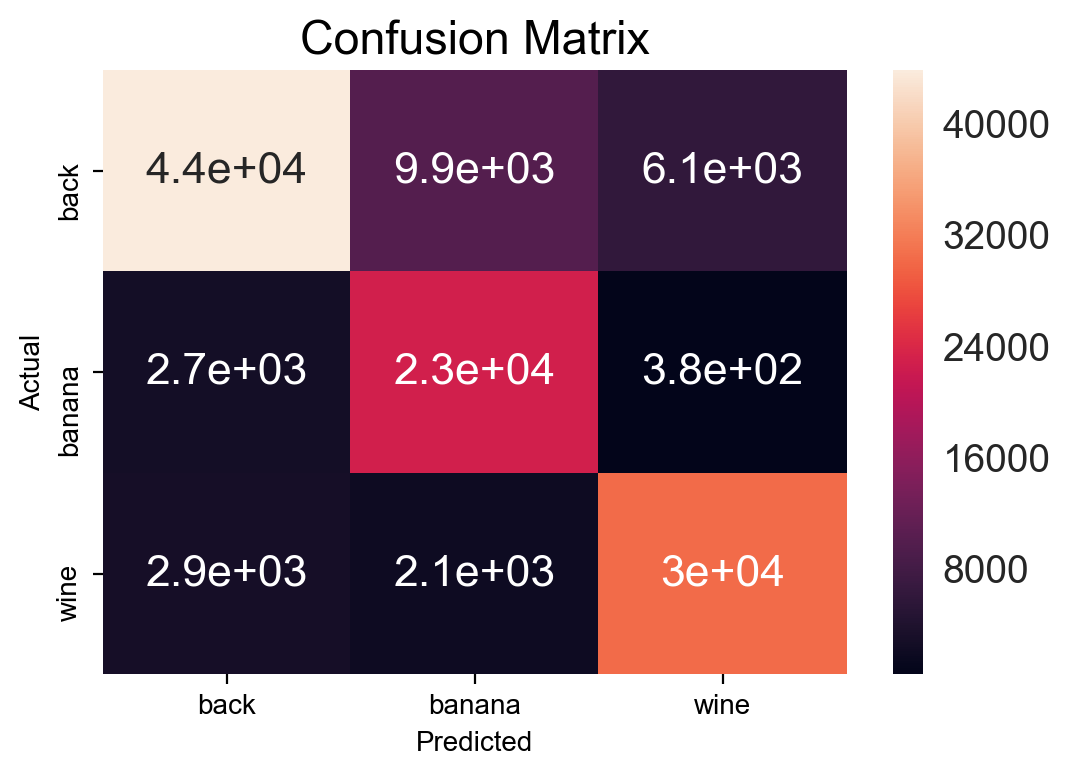

In [7]:
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_train, predict_train))
print(classification_report(y_test, predict_test))
class_set = np.asarray(sorted(set(y))) #las hipótesis posibles
class_set[class_set=="background"]="back"
plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test, predict_test), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()

             precision    recall  f1-score   support

 background       0.85      0.82      0.83    121529
     banana       0.76      0.80      0.78     52375
       wine       0.84      0.86      0.85     72159

avg / total       0.83      0.83      0.83    246063

             precision    recall  f1-score   support

 background       0.85      0.82      0.83     59827
     banana       0.76      0.80      0.78     26066
       wine       0.84      0.86      0.85     35303

avg / total       0.83      0.83      0.83    121196



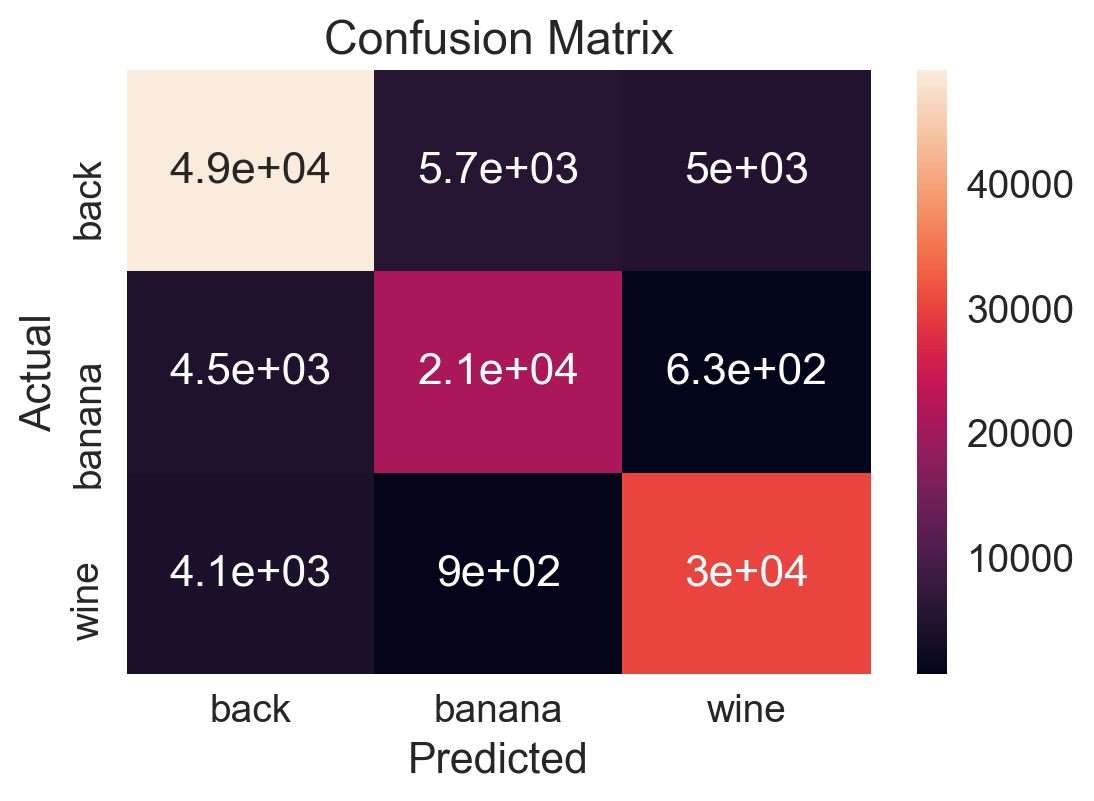

In [8]:

x_new = x[x.columns.drop(list(df.filter(regex='(Temp)|(Hum)')))]
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10,10), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train_new,y_train_new)

predict_train_new = mlp.predict(x_train_new)
predict_test_new = mlp.predict(x_test_new)

print(classification_report(y_train_new, predict_train_new))
print(classification_report(y_test_new, predict_test_new))
plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test_new, predict_test_new), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()


             precision    recall  f1-score   support

 background       0.85      0.82      0.83     59827
     banana       0.76      0.80      0.78     26066
       wine       0.84      0.86      0.85     35303

avg / total       0.83      0.83      0.83    121196

             precision    recall  f1-score   support

 background       0.89      0.73      0.80     59827
     banana       0.66      0.88      0.75     26066
       wine       0.83      0.86      0.84     35303

avg / total       0.82      0.80      0.80    121196

0.801990164691904


<function matplotlib.pyplot.show(close=None, block=None)>

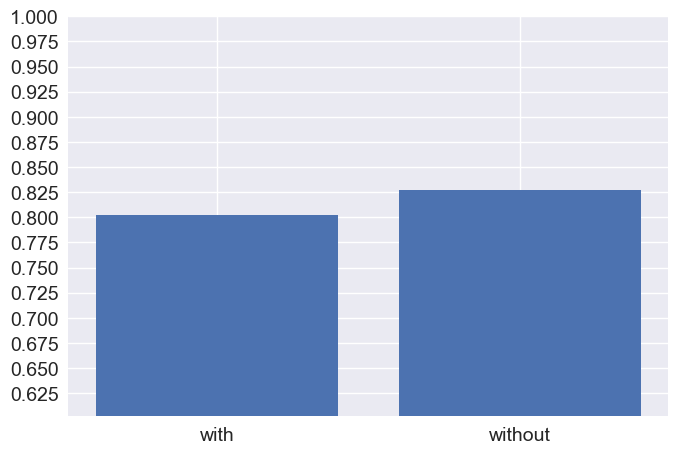

In [9]:
print(classification_report(y_test_new, predict_test_new))
print(classification_report(y_test, predict_test))
plt.rcParams['figure.dpi'] = 100
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_test))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["with", "without"]
values = [accuracy_score(y_test, predict_test), accuracy_score(y_test_new, predict_test_new)]
ax.bar(langs, values)
plt.yticks(np.arange(0, 1.1, 0.025))
ax.set(ylim=[min(values)-0.2, 1])
plt.show


In [10]:
F_TEST_DATASET = "./data/filas_test.dat"

FEATURES_ORIGINAL = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity']
FEATURES = [
  'R1', 'R1_mean', 'R1_dev',
  'R2', 'R2_mean', 'R2_dev',
  'R3', 'R3_mean', 'R3_dev',
  'R4', 'R4_mean', 'R4_dev',
  'R5', 'R5_mean', 'R5_dev',
  'R6', 'R6_mean', 'R6_dev',
  'R7', 'R7_mean', 'R7_dev',
  'R8', 'R8_mean', 'R8_dev',
#   'Temp.', 'Temp._mean', 'Temp._dev',
#   'Humidity', 'Humidity_mean', 'Humidity_dev',
]

dtest = pd.read_csv(F_TEST_DATASET, sep=",")
dtest['class']  = 'background'
dtest.head()

,,,,,,,,,,,,,,,,R1,R1_mean,R1_dev,R2,R2_mean,R2_dev,R3,R3_mean,R3_dev,R4,...,R6,R6_mean,R6_dev,R7,R7_mean,R7_dev,R8,R8_mean,R8_dev,class
12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,12.862100,12.8621,0.000000,10.368300,10.36830,0.000000,10.43830,10.43830,0.000000,11.669900,11.6699,0.000000,13.493100,13.49310,0.000000,13.342300,...,8.739010,8.739010,0.000000,26.22570,26.22570,0.000000,59.052800,59.05280,0.000000,background
12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,12.861900,12.8619,0.000200,10.368250,10.36825,0.000050,10.43790,10.43790,0.000400,11.669800,11.6698,0.000100,13.492900,13.49290,0.000200,13.341750,...,8.739045,8.739045,0.000035,26.22825,26.22825,0.002550,59.041350,59.04135,0.011450,background
12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,12.861500,12.8617,0.000589,10.368367,10.36830,0.000170,10.43760,10.43750,0.000535,11.669733,11.6697,0.000125,13.492733,13.49270,0.000287,13.341333,...,8.739080,8.739080,0.000057,26.23100,26.23080,0.004411,59.030667,59.02990,0.017767,background
12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,12.861175,12.8612,0.000760,10.368425,10.36845,0.000179,10.43745,10.43725,0.000532,11.669725,11.6697,0.000109,13.492575,13.49255,0.000370,13.340950,...,8.739150,8.739115,0.000131,26.23365,26.23365,0.005972,59.020625,59.01960,0.023222,background
12.8594,10.3691,10.4376,11.6702,13.4921,13.3382,8.04088,8.74016,26.2503,58.9583,12.860840,12.8607,0.000954,10.368500,10.36860,0.000219,10.43744,10.43740,0.000476,11.669760,11.6697,0.000120,13.492440,13.49240,0.000427,13.340560,...,8.739292,8.739150,0.000307,26.23616,26.23650,0.007330,59.011220,59.00930,0.028022,background


In [18]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

def print_metrics(y_test, y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F1-score:",metrics.f1_score(y_test, y_pred, average='weighted'))
    plt.rcParams['figure.dpi'] = 70
    cm = metrics.confusion_matrix(y_test, y_pred)
    cmdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    cmdisp.plot()
    plt.show()

(675168,) (675168, 24)
12.8617  10.3682  10.4375  11.6697  13.4927  13.3412  8.04133  8.73908  26.2308  59.0299  12.862100  12.86210  0.000000  10.368300  10.36830  0.000000    background
12.8607  10.3686  10.4370  11.6696  13.4924  13.3405  8.04101  8.73915  26.2365  59.0093  12.861900  12.86190  0.000200  10.368250  10.36825  0.000050    background
12.8602  10.3686  10.4370  11.6697  13.4921  13.3398  8.04086  8.73936  26.2416  58.9905  12.861500  12.86170  0.000589  10.368367  10.36830  0.000170    background
12.8595  10.3688  10.4374  11.6699  13.4919  13.3390  8.04087  8.73986  26.2462  58.9736  12.861175  12.86120  0.000760  10.368425  10.36845  0.000179    background
12.8594  10.3691  10.4376  11.6702  13.4921  13.3382  8.04088  8.74016  26.2503  58.9583  12.860840  12.86070  0.000954  10.368500  10.36860  0.000219    background
12.8595  10.3695  10.4378  11.6702  13.4919  13.3377  8.04060  8.74013  26.2541  58.9445  12.860600  12.86045  0.001023  10.368600  10.36860  0.000300  

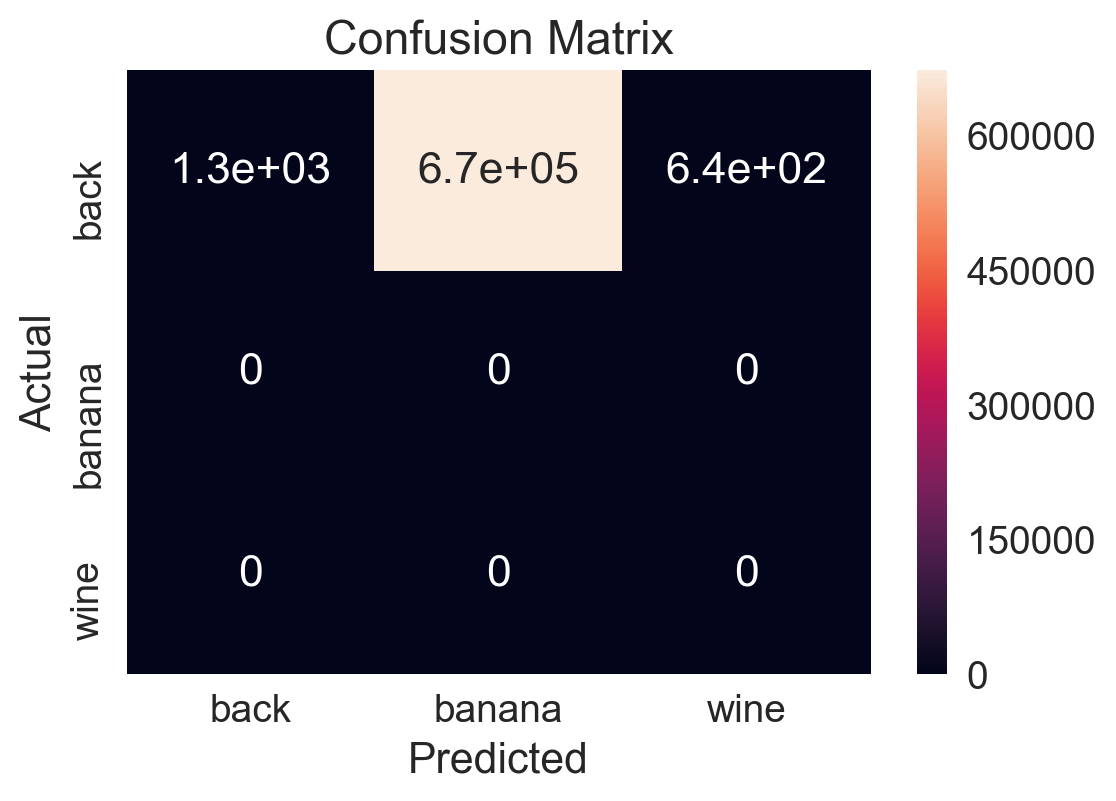

In [12]:
y_test_fet=dtest['class']
X_test = dtest[FEATURES]
print(y_test.shape, X_test.shape)
y_pred_feat = mlp.predict(X_test)

print(y_test[:6])
print(y_pred[:6])

plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test, y_pred_feat), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()

Ahora buscaremos mejorar la elección de hiperparámetros, los hiperparámetros son parámetros que no se aprenden directamente con los estimadores, para estimar los valores que arrojen mejores resultados utilizando para ello una grid search, la cual es una técnica de validación cruzada que se ejecuta a través de los diferentes parámetros y extrae de estos las mejores combinaciones de parámetros.
Para el número de neuronas y capas ocultas se ha optado por probar varias combinaciones que concuerden con varios parámetros donde se estima se encontrará los valores óptimos para estos:
(https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3#:~:text=The%20number%20of%20hidden%20neurons%20should%20be%202%2F3%20the,size%20of%20the%20input%20layer.) </br>
-> The number of hidden neurons should be between the size of the input layer and the size of the output layer. </br>
-> The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer. </br>
-> The number of hidden neurons should be less than twice the size of the input layer. </br>

In [14]:
mlp = MLPClassifier(max_iter=500)

hlayers = [(10, 10, 10), (12, 16, 20, 24), (24, 20, 16), (24, 20, 16, 12)] #conjunto con las combinaciones de neuronas y capas ocultas


parameter_space = {
    'hidden_layer_sizes': hlayers,
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam',],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV
mlp_clf = MLPClassifier(max_iter=100)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose=1)
clf.fit(x_train_new, y_train_new)

print('Best parameters found:\n', clf.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (24, 20, 16, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}


/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda3.5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/anaconda3.5/lib/python3.6/site-packages/sklear

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activation,param_hidden_layer_sizes,param_learning_rate,param_solver,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
30,143.628866,0.176157,0.930827,0.931889,relu,"(24, 20, 16, 12)",adaptive,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (24, 20, 16, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}",1,0.935103,0.936748,0.939589,0.939729,0.917788,0.919192,26.352993,0.043950,0.009400,0.009061
11,64.138471,0.345832,0.923166,0.924109,tanh,"(24, 20, 16)",adaptive,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (24, 20, 16), 'learning_rate': 'adaptive', 'solver': 'adam'}",2,0.925081,0.926250,0.921849,0.923440,0.922568,0.922636,10.088559,0.050359,0.001386,0.001549
15,65.467211,0.474105,0.916940,0.917804,tanh,"(24, 20, 16, 12)",adaptive,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (24, 20, 16, 12), 'learning_rate': 'adaptive', 'solver': 'adam'}",3,0.922582,0.921989,0.921337,0.922873,0.906901,0.908548,12.156380,0.058238,0.007117,0.006554
13,77.344974,0.449055,0.911096,0.913063,tanh,"(24, 20, 16, 12)",constant,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (24, 20, 16, 12), 'learning_rate': 'constant', 'solver': 'adam'}",4,0.908159,0.912223,0.916729,0.918119,0.908400,0.908847,11.668442,0.040710,0.003984,0.003831
29,70.312006,0.208204,0.907507,0.908351,relu,"(24, 20, 16, 12)",constant,adam,"{'activation': 'relu', 'hidden_layer_sizes': (24, 20, 16, 12), 'learning_rate': 'constant', 'solver': 'adam'}",5,0.896174,0.898666,0.905597,0.905299,0.920751,0.921088,10.031597,0.036031,0.010124,0.009405
9,86.478557,0.350959,0.906053,0.908133,tanh,"(24, 20, 16)",constant,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (24, 20, 16), 'learning_rate': 'constant', 'solver': 'adam'}",6,0.913877,0.916618,0.893198,0.894771,0.911083,0.913011,4.278925,0.010159,0.009161,0.009563
27,57.441242,0.189586,0.902818,0.903655,relu,"(24, 20, 16)",adaptive,adam,"{'activation': 'relu', 'hidden_layer_sizes': (24, 20, 16), 'learning_rate': 'adaptive', 'solver': 'adam'}",7,0.914499,0.914972,0.895502,0.897215,0.898452,0.898777,12.630895,0.025793,0.008347,0.008028
26,96.229853,0.198434,0.899896,0.901082,relu,"(24, 20, 16)",adaptive,sgd,"{'activation': 'relu', 'hidden_layer_sizes': (24, 20, 16), 'learning_rate': 'adaptive', 'solver': 'sgd'}",8,0.904416,0.906212,0.891223,0.891583,0.904048,0.905452,13.168438,0.023396,0.006134,0.006724
31,51.355811,0.184657,0.898628,0.899223,relu,"(24, 20, 16, 12)",adaptive,adam,"{'activation': 'relu', 'hidden_layer_sizes': (24, 20, 16, 12), 'learning_rate': 'adaptive', 'solver': 'adam'}",9,0.898869,0.898471,0.895966,0.896088,0.901049,0.903111,9.063715,0.008483,0.002082,0.002916
25,61.501047,0.184244,0.896738,0.897498,relu,"(24, 20, 16)",constant,adam,"{'activation': 'relu', 'hidden_layer_sizes': (24, 20, 16), 'learning_rate': 'constant', 'solver': 'adam'}",10,0.903623,0.904829,0.906768,0.906030,0.879822,0.881635,7.436630,0.008935,0.012030,0.011228


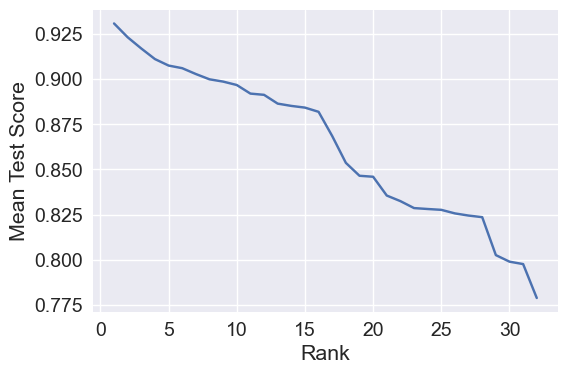

In [34]:
#Resultados del grid search
dFrame = pd.DataFrame(clf.cv_results_)
nResults=10
pd.set_option('display.max_colwidth', -1)
#mostramos una tabla con los 10 mejores valores
dFrameOrdered=dFrame.sort_values(by='rank_test_score')
display(dFrameOrdered.head(nResults))
dFrameOrdered.to_csv('gridSearch.csv')
#gráfica para ver los mean_test_scores de todas las combinaciones
plt.plot(dFrameOrdered['rank_test_score'], dFrameOrdered['mean_test_score'])
# naming the x axis
plt.xlabel('Rank')
# naming the y axis
plt.ylabel('Mean Test Score')
plt.show()

             precision    recall  f1-score   support

 background       0.90      0.92      0.91    121529
     banana       0.89      0.87      0.88     52375
       wine       0.95      0.91      0.93     72159

avg / total       0.91      0.91      0.91    246063

             precision    recall  f1-score   support

 background       0.90      0.92      0.91     59827
     banana       0.89      0.87      0.88     26066
       wine       0.95      0.91      0.93     35303

avg / total       0.91      0.91      0.91    121196



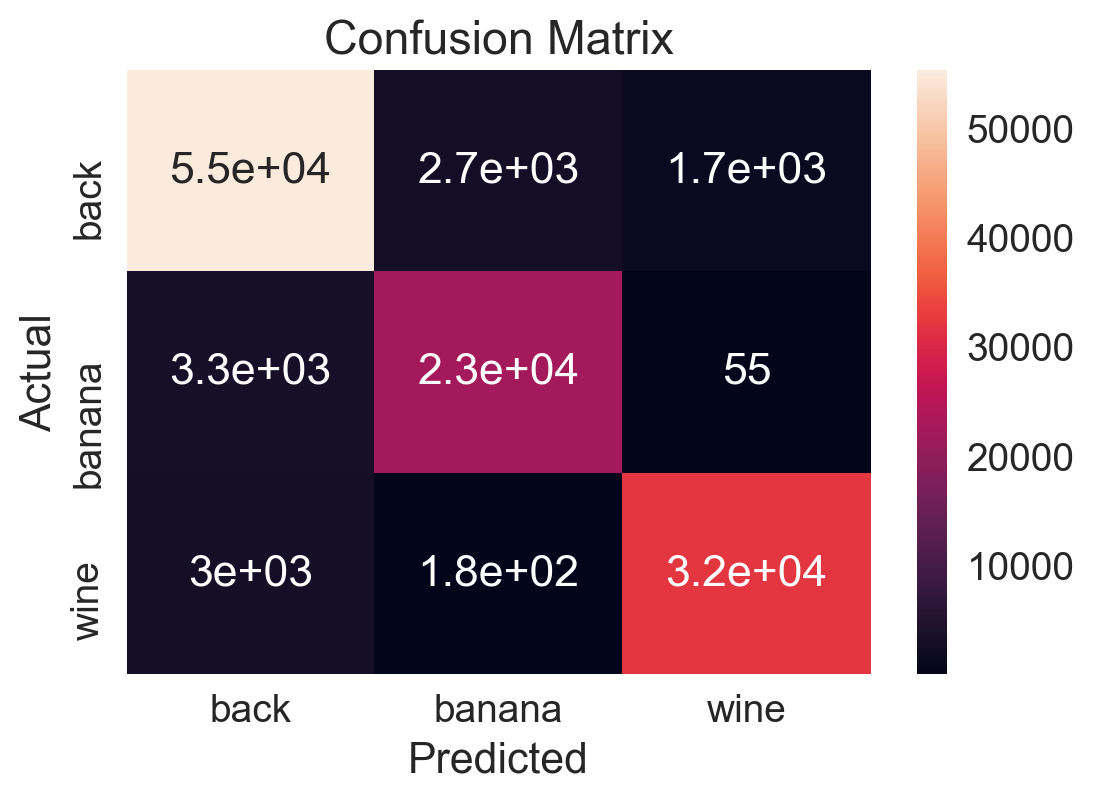

In [19]:
#matriz de confusion y reports
predict_test_clf = clf.predict(x_test_new)
predict_train_clf = clf.predict(x_train_new)
print(classification_report(y_train_new, predict_train_clf))
print(classification_report(y_test_new, predict_test_clf))
plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test_new, predict_test_clf), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()

             precision    recall  f1-score   support

 background       0.90      0.92      0.91     59827
     banana       0.89      0.87      0.88     26066
       wine       0.95      0.91      0.93     35303

avg / total       0.91      0.91      0.91    121196

             precision    recall  f1-score   support

 background       0.85      0.82      0.83     59827
     banana       0.76      0.80      0.78     26066
       wine       0.84      0.86      0.85     35303

avg / total       0.83      0.83      0.83    121196

             precision    recall  f1-score   support

 background       0.82      0.82      0.82     59827
     banana       0.73      0.80      0.76     26066
       wine       0.85      0.81      0.83     35303

avg / total       0.81      0.81      0.81    121196

0.8092016238159675


<function matplotlib.pyplot.show(close=None, block=None)>

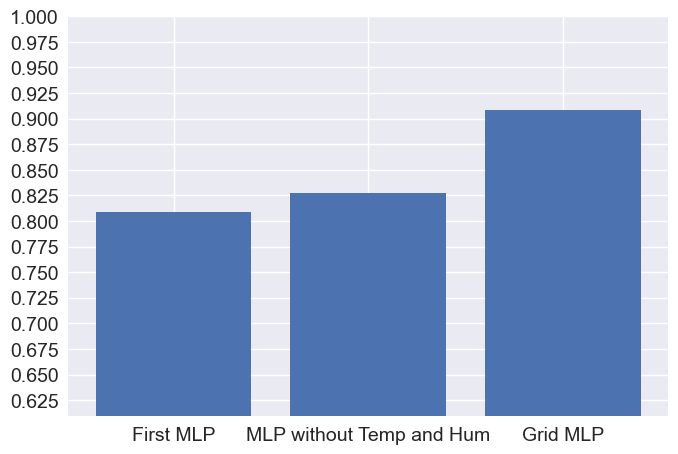

In [22]:
#comparación con los otros resultados
print(classification_report(y_test_new, predict_test_clf))
print(classification_report(y_test_new, predict_test_new))
print(classification_report(y_test, predict_test))
plt.rcParams['figure.dpi'] = 100
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_test))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["First MLP", "MLP without Temp and Hum", "Grid MLP"]
values = [accuracy_score(y_test, predict_test), accuracy_score(y_test_new, predict_test_new), accuracy_score(y_test_new, predict_test_clf)]
ax.bar(langs, values)
plt.yticks(np.arange(0, 1.1, 0.025))
ax.set(ylim=[min(values)-0.2, 1])
plt.show